# Credit Risk Problem - MILESTONE1

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A **balance sheet** is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the **financial statement of the companies for the previous year (2015)**. Also, information about **the Networth of the company in the following year (2016)** is provided which can be used to drive the labeled field.

*Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'*

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("Company_Data2015-1.xlsx") # importing excel data

In [4]:
df.head() # Glimpse of the dataset

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Now, Let's first rename the columns as per the data dictionary 

In [5]:
data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict = data_dict.drop("#",axis=1)
data_dict.head()

,Field Name,Description,New Field Name
0,Co_Code,Company Code,Co_Code
1,Co_Name,Company Name,Co_Name
2,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,Networth,Value of a company as on 2015 - Current Year,Networth


In [6]:
col_rename_dict = dict()
for i in data_dict.index:
    col_rename_dict[data_dict['Field Name'][i]] = data_dict['New Field Name'][i]

In [7]:
df = df.rename(columns=col_rename_dict)

#### Let us check the number of rows (observations) and the number of columns (variables).

In [8]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Data types of all variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [10]:
df.duplicated().sum() # Checking for duplicates

0

#### Checking for missing values

In [11]:
df.isnull().sum() 

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Debtors_Vel_Days                     0
Creditors_Vel_Days                   0
Inventory_Vel_Days                 103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
Length: 67, dtype: int64

In [12]:
for i in df.columns:
    if df[i].isnull().sum() !=0:
        print("{a} contains {b} null values".format(a=i,b=df[i].isnull().sum())) 

Book_Value_Adj_Unit_Curr contains 4 null values
Curr_Ratio_Latest contains 1 null values
Fixed_Assets_Ratio_Latest contains 1 null values
Inventory_Ratio_Latest contains 1 null values
Debtors_Ratio_Latest contains 1 null values
Total_Asset_Turnover_Ratio_Latest contains 1 null values
Interest_Cover_Ratio_Latest contains 1 null values
PBIDTM_perc_Latest contains 1 null values
PBITM_perc_Latest contains 1 null values
PBDTM_perc_Latest contains 1 null values
CPM_perc_Latest contains 1 null values
APATM_perc_Latest contains 1 null values
Inventory_Vel_Days contains 103 null values


In [13]:
df[df['PBIDTM_perc_Latest'].isnull()]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
2825,3240,G M Breweries,180.99,11.71,126.2,158.3,32.1,130.8,-7.65,39.86,...,NaN,NaN,NaN,NaN,NaN,0,6,23.0,2.98,5.53


In [14]:
df[df['PBIDTM_perc_Latest'].isnull()].isnull().sum().sum() 

11

Total 11 columns are empty for this company hence we are dropping this data point from further analysis.

In [15]:
df = df.drop(2825).reset_index(drop=True)

In [16]:
# Again checking for the null values
for i in df.columns:
    if df[i].isnull().sum() !=0:
        print("{a} contains {b} null values".format(a=i,b=df[i].isnull().sum())) 

Book_Value_Adj_Unit_Curr contains 4 null values
Inventory_Vel_Days contains 103 null values


#### Imputing missing values by median

Though any other method can also be used as per the domain knowledge but here we are simply doing the median value imputation. 

In [17]:
df['Book_Value_Adj_Unit_Curr'].replace(to_replace=np.nan,value=df['Book_Value_Adj_Unit_Curr'].median(),inplace=True)
df['Inventory_Vel_Days'].replace(to_replace=np.nan,value=df['Inventory_Vel_Days'].median(),inplace=True)

## Creating target Variable

In [18]:
y = np.where(df['Networth_Next_Year']<0,1,0)

Note that no operation was performed so far which has made any changes for `Networth_Next_Year` variable as it is our target variable

In [19]:
unique,counts = np.unique(y,return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3198]
 [   1  387]]


### Outliers Treatment

In [20]:
num_cols = list(df.columns)
num_cols.remove('Co_Code')
num_cols.remove('Co_Name')

In [21]:
def outlier_detect(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

Percentage outliers:  0.18856345885634587


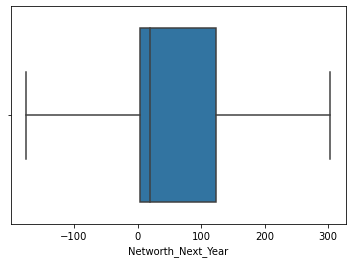

****************************************************************************************************
Percentage outliers:  0.12496513249651325


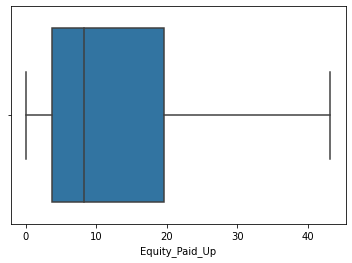

****************************************************************************************************
Percentage outliers:  0.18131101813110181


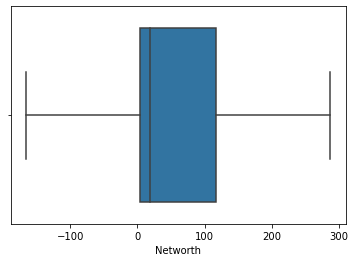

****************************************************************************************************
Percentage outliers:  0.16624825662482567


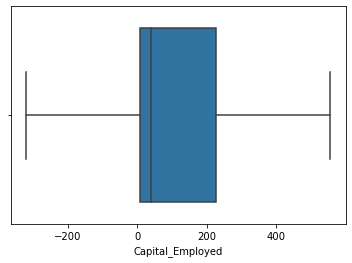

****************************************************************************************************
Percentage outliers:  0.16262203626220362


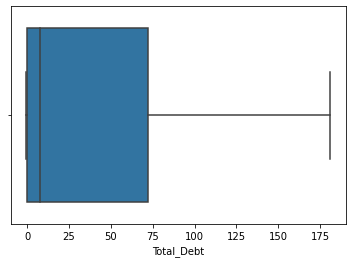

****************************************************************************************************
Percentage outliers:  0.1506276150627615


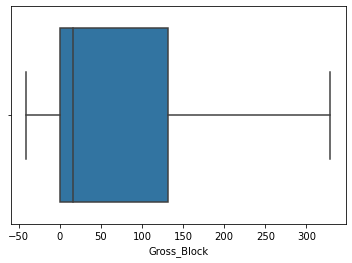

****************************************************************************************************
Percentage outliers:  0.17433751743375175


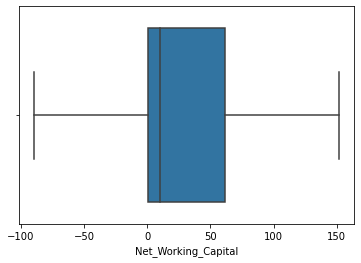

****************************************************************************************************
Percentage outliers:  0.1609483960948396


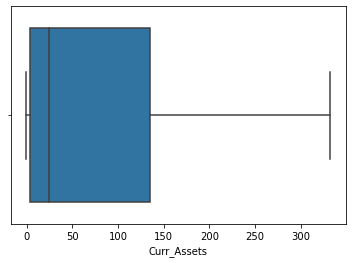

****************************************************************************************************
Percentage outliers:  0.16206415620641562


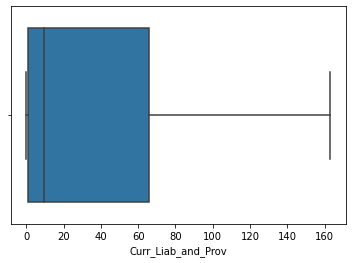

****************************************************************************************************
Percentage outliers:  0.1601115760111576


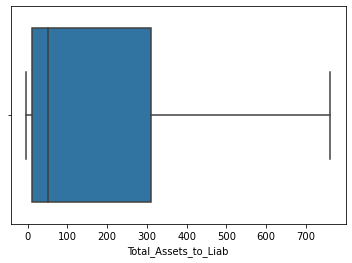

****************************************************************************************************
Percentage outliers:  0.15425383542538354


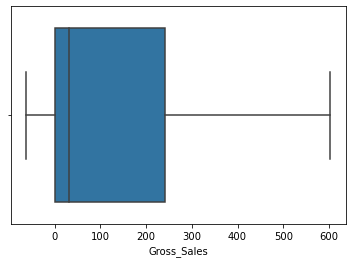

****************************************************************************************************
Percentage outliers:  0.15509065550906556


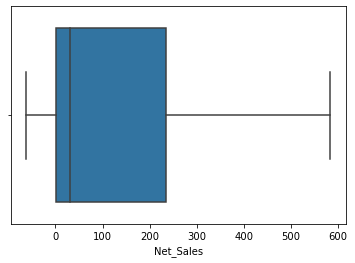

****************************************************************************************************
Percentage outliers:  0.1679218967921897


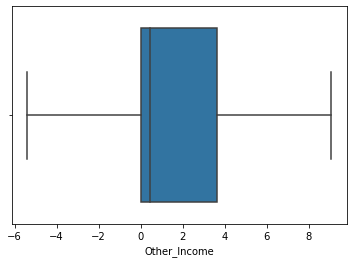

****************************************************************************************************
Percentage outliers:  0.15592747559274756


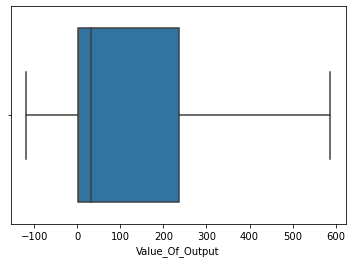

****************************************************************************************************
Percentage outliers:  0.15676429567642958


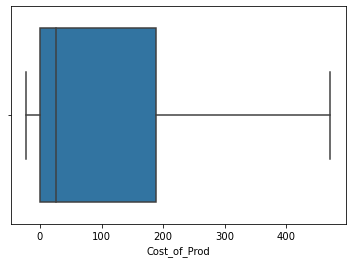

****************************************************************************************************
Percentage outliers:  0.1695955369595537


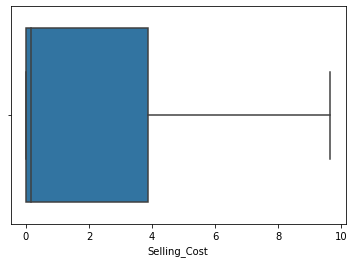

****************************************************************************************************
Percentage outliers:  0.18828451882845187


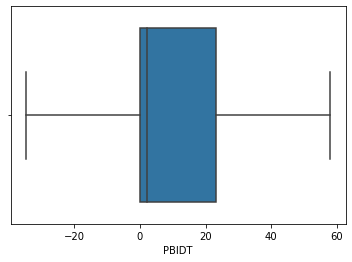

****************************************************************************************************
Percentage outliers:  0.22705718270571826


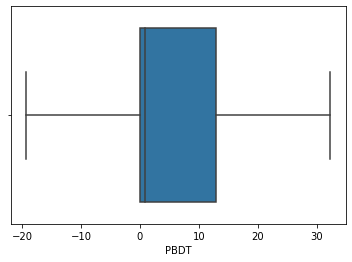

****************************************************************************************************
Percentage outliers:  0.200836820083682


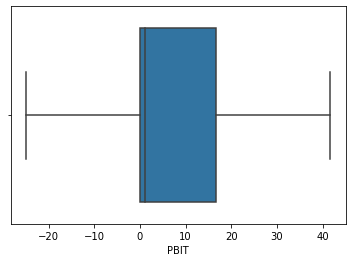

****************************************************************************************************
Percentage outliers:  0.26220362622036264


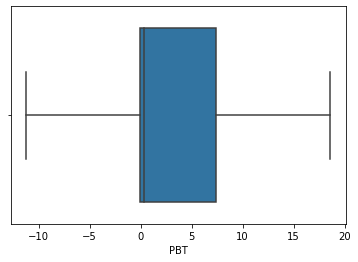

****************************************************************************************************
Percentage outliers:  0.26722454672245466


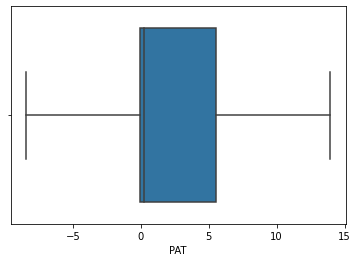

****************************************************************************************************
Percentage outliers:  0.26610878661087867


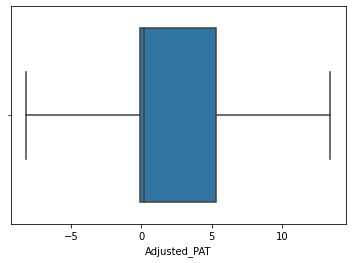

****************************************************************************************************
Percentage outliers:  0.22845188284518828


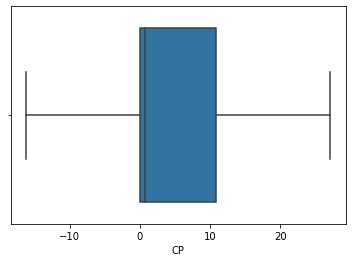

****************************************************************************************************
Percentage outliers:  0.20585774058577405


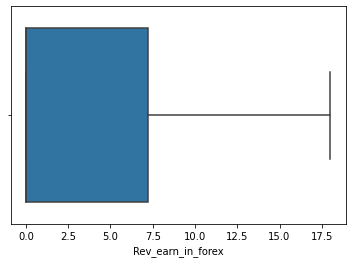

****************************************************************************************************
Percentage outliers:  0.19330543933054392


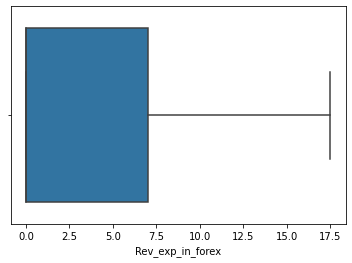

****************************************************************************************************
Percentage outliers:  0.19358437935843795


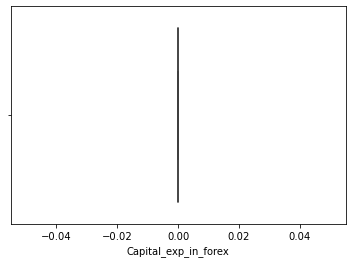

****************************************************************************************************
Percentage outliers:  0.13584379358437937


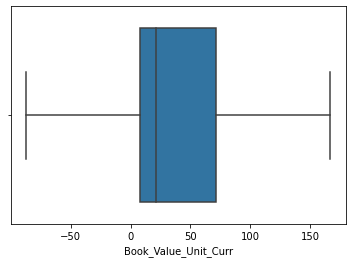

****************************************************************************************************
Percentage outliers:  0.13556485355648534


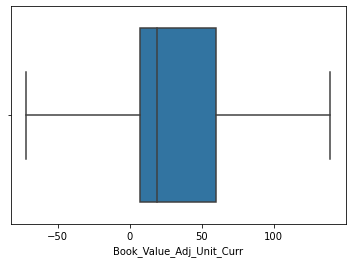

****************************************************************************************************
Percentage outliers:  0.17824267782426778


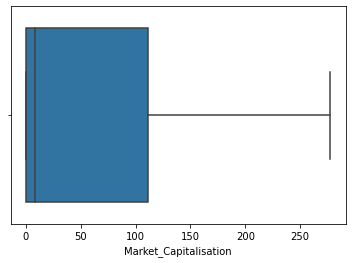

****************************************************************************************************
Percentage outliers:  0.16875871687587168


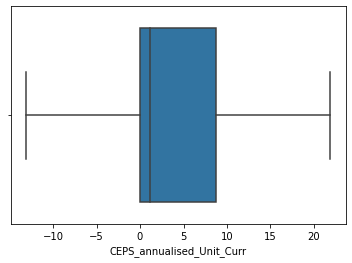

****************************************************************************************************
Percentage outliers:  0.22370990237099023


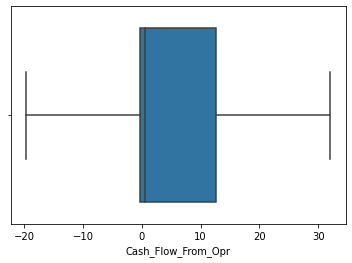

****************************************************************************************************
Percentage outliers:  0.24463040446304044


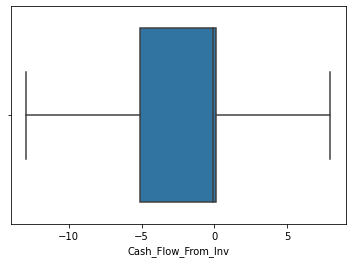

****************************************************************************************************
Percentage outliers:  0.2803347280334728


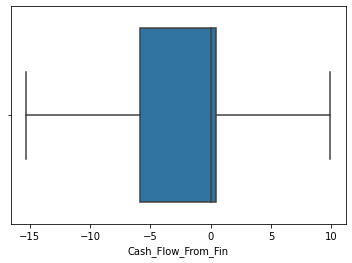

****************************************************************************************************
Percentage outliers:  0.2083682008368201


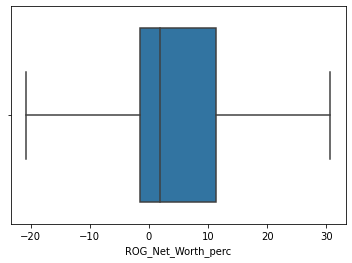

****************************************************************************************************
Percentage outliers:  0.15955369595536958


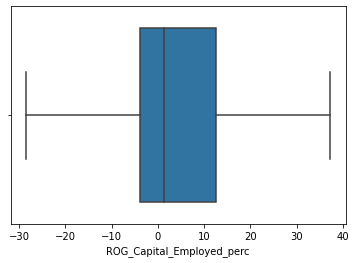

****************************************************************************************************
Percentage outliers:  0.2315202231520223


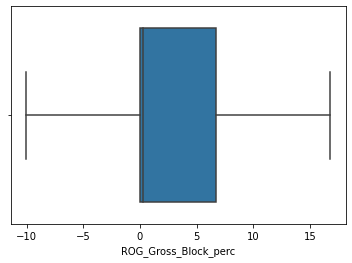

****************************************************************************************************
Percentage outliers:  0.18716875871687588


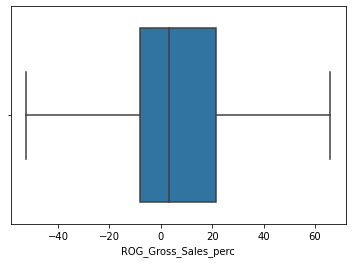

****************************************************************************************************
Percentage outliers:  0.18605299860529986


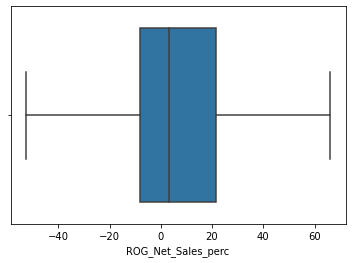

****************************************************************************************************
Percentage outliers:  0.18828451882845187


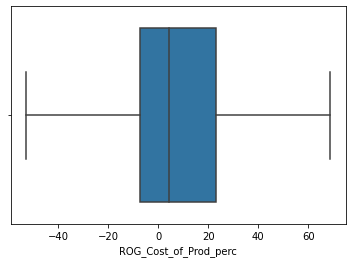

****************************************************************************************************
Percentage outliers:  0.13472803347280335


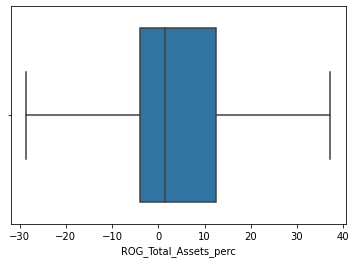

****************************************************************************************************
Percentage outliers:  0.1704323570432357


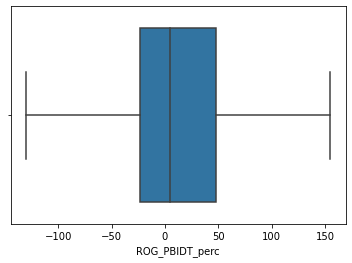

****************************************************************************************************
Percentage outliers:  0.17517433751743375


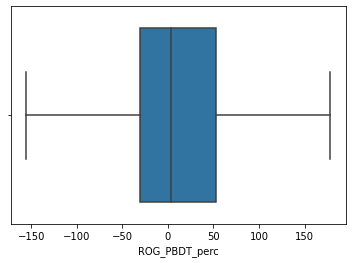

****************************************************************************************************
Percentage outliers:  0.17182705718270572


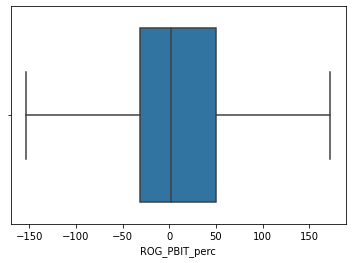

****************************************************************************************************
Percentage outliers:  0.1704323570432357


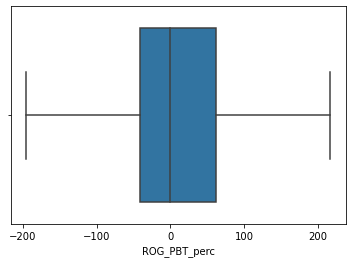

****************************************************************************************************
Percentage outliers:  0.16680613668061367


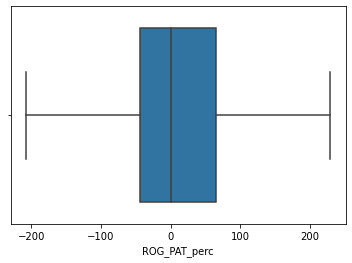

****************************************************************************************************
Percentage outliers:  0.17768479776847979


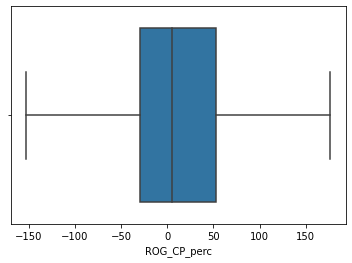

****************************************************************************************************
Percentage outliers:  0.3673640167364017


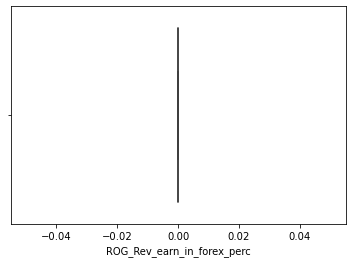

****************************************************************************************************
Percentage outliers:  0.4504881450488145


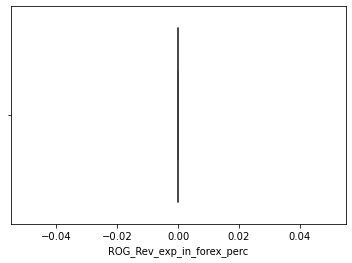

****************************************************************************************************
Percentage outliers:  0.13863319386331938


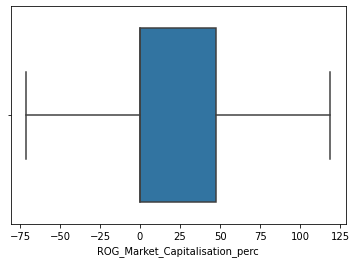

****************************************************************************************************
Percentage outliers:  0.15760111576011157


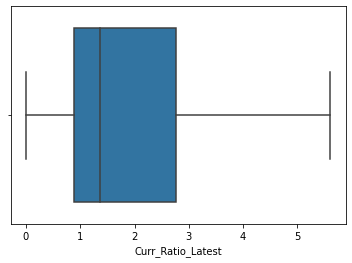

****************************************************************************************************
Percentage outliers:  0.13807531380753138


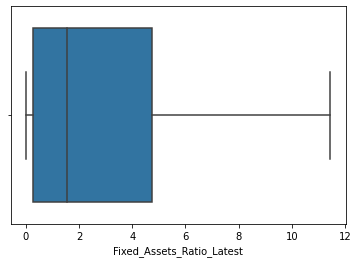

****************************************************************************************************
Percentage outliers:  0.10460251046025104


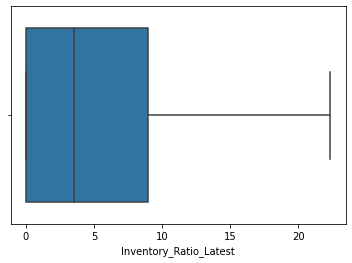

****************************************************************************************************
Percentage outliers:  0.10348675034867504


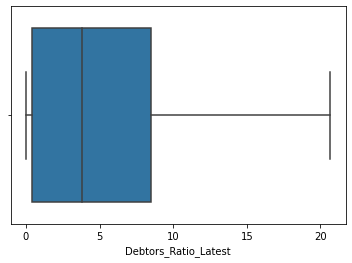

****************************************************************************************************
Percentage outliers:  0.05606694560669456


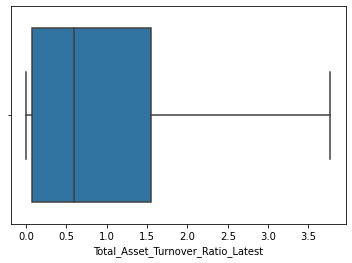

****************************************************************************************************
Percentage outliers:  0.20223152022315202


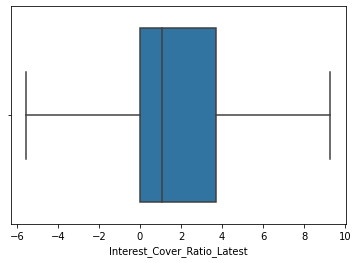

****************************************************************************************************
Percentage outliers:  0.16596931659693165


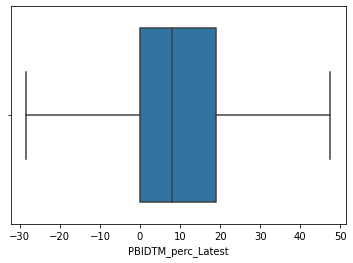

****************************************************************************************************
Percentage outliers:  0.2


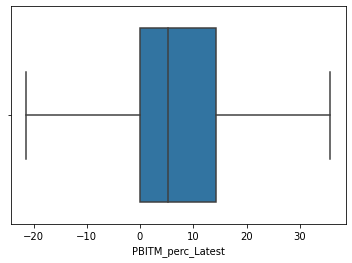

****************************************************************************************************
Percentage outliers:  0.19386331938633194


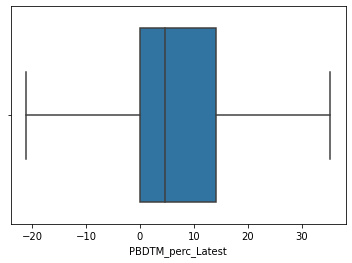

****************************************************************************************************
Percentage outliers:  0.200836820083682


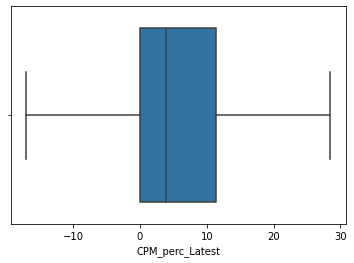

****************************************************************************************************
Percentage outliers:  0.2602510460251046


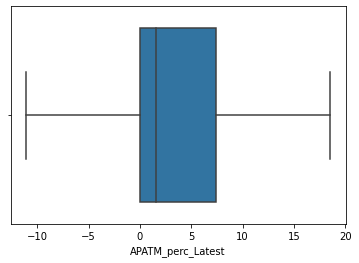

****************************************************************************************************
Percentage outliers:  0.1110181311018131


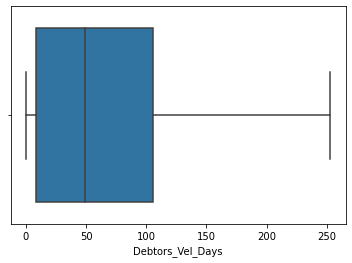

****************************************************************************************************
Percentage outliers:  0.10906555090655509


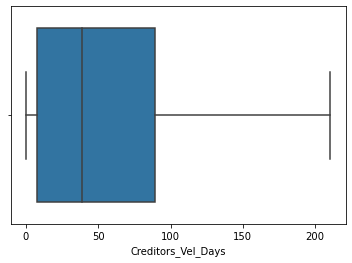

****************************************************************************************************
Percentage outliers:  0.07782426778242678


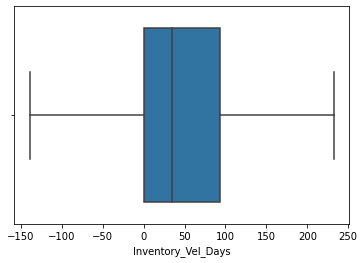

****************************************************************************************************
Percentage outliers:  0.04156206415620642


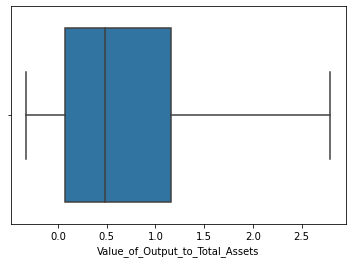

****************************************************************************************************
Percentage outliers:  0.13417015341701535


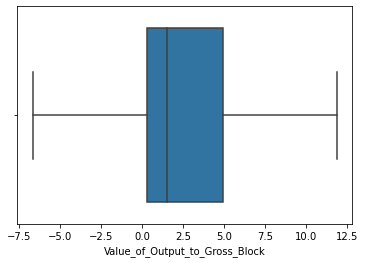

****************************************************************************************************


In [22]:
for i in num_cols:
    
    # Percentage outliers present in the dataset
    lr,ur = outlier_detect(df[i])
    num_outs=np.where(df[i]>ur,1,0).sum()
    num_outs+= np.where(df[i]<lr,1,0).sum()
    pct_outs = num_outs/len(df[i])
    print("Percentage outliers: ",pct_outs)
    
    # Capping the values with the LR and UR
    df[i] = np.where(df[i]>ur,ur,df[i])
    df[i] = np.where(df[i]<lr,lr,df[i])
    
    sns.boxplot(data=df,x=i)
    plt.show()
    print('*'*100)

# Univariate and Bi-variate analysis

In [23]:
imp_cols = ['Equity_Paid_Up', 'Total_Debt', 'Book_Value_Adj_Unit_Curr', 'CEPS_annualised_Unit_Curr', 'Curr_Ratio_Latest',
 'Debtors_Ratio_Latest', 'PBITM_perc_Latest'] #found after performing the analysis

imp_cols_tar = ['Equity_Paid_Up', 'Total_Debt', 'Book_Value_Adj_Unit_Curr', 'CEPS_annualised_Unit_Curr', 'Curr_Ratio_Latest',
 'Debtors_Ratio_Latest', 'PBITM_perc_Latest','Networth_Next_Year']

In [24]:
df[imp_cols].describe()

,Equity_Paid_Up,Total_Debt,Book_Value_Adj_Unit_Curr,CEPS_annualised_Unit_Curr,Curr_Ratio_Latest,Debtors_Ratio_Latest,PBITM_perc_Latest
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,13.996070,47.475955,38.096106,4.805310,2.084286,5.990901,7.214545
std,14.004971,68.289989,50.058057,8.972073,1.806562,6.626860,15.284085
min,0.000000,-0.720000,-72.200000,-13.125000,0.000000,0.000000,-21.435000
25%,3.750000,0.030000,7.060000,0.000000,0.880000,0.420000,0.000000
50%,8.290000,7.480000,18.920000,1.140000,1.360000,3.820000,5.230000
75%,19.520000,72.430000,59.900000,8.750000,2.770000,8.520000,14.290000
max,43.175000,181.030000,139.160000,21.875000,5.605000,20.670000,35.725000


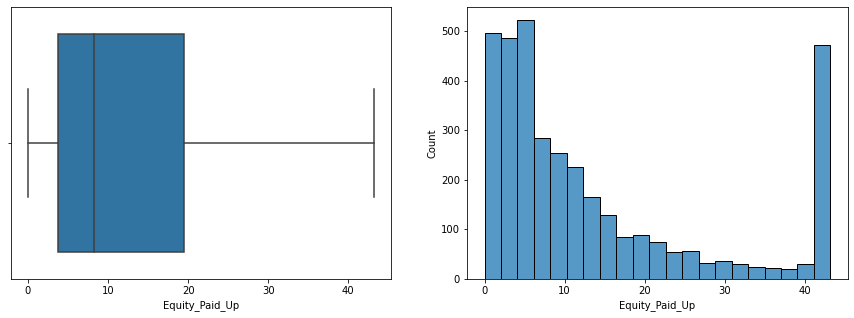

************************************************************************************************************************ 
************************************************************************************************************************


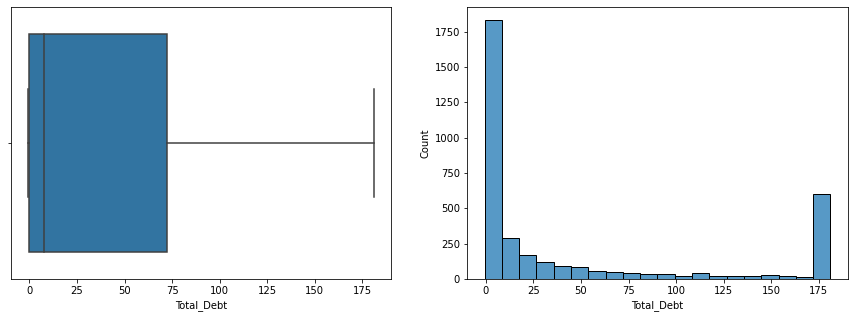

************************************************************************************************************************ 
************************************************************************************************************************


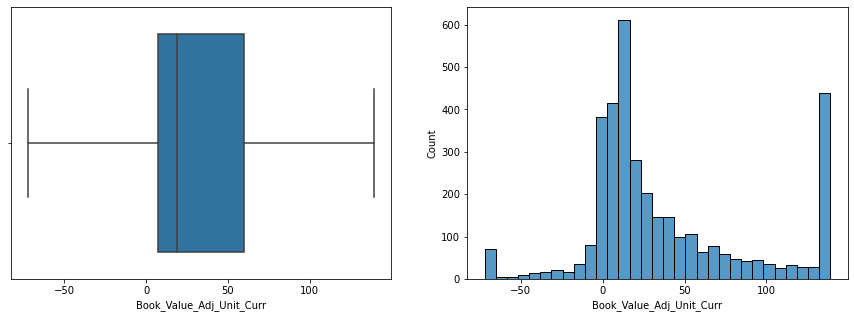

************************************************************************************************************************ 
************************************************************************************************************************


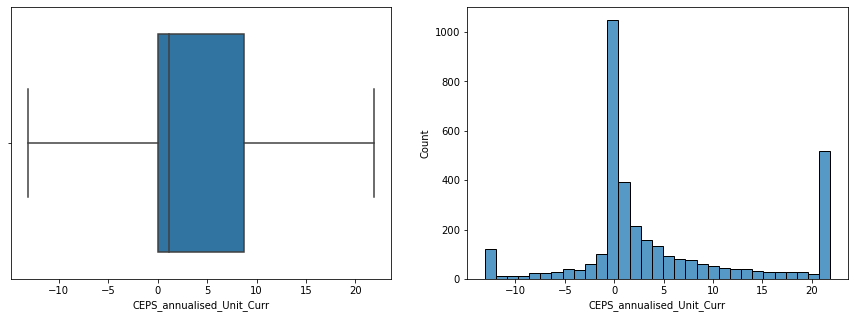

************************************************************************************************************************ 
************************************************************************************************************************


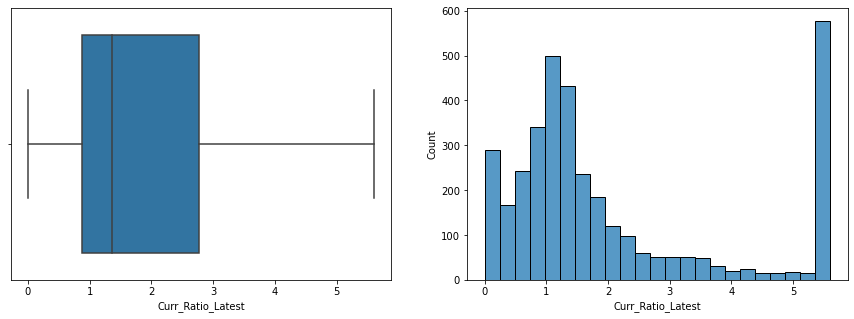

************************************************************************************************************************ 
************************************************************************************************************************


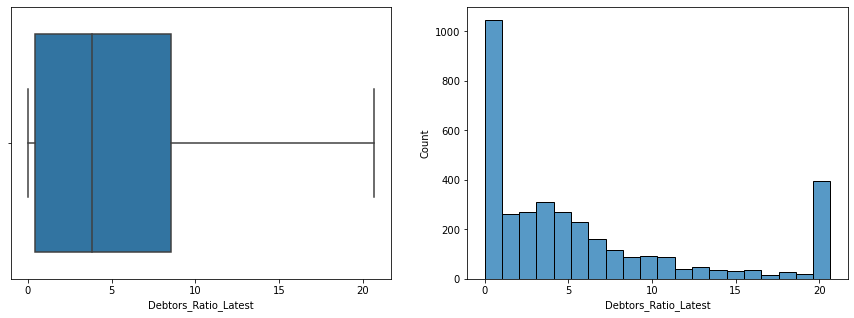

************************************************************************************************************************ 
************************************************************************************************************************


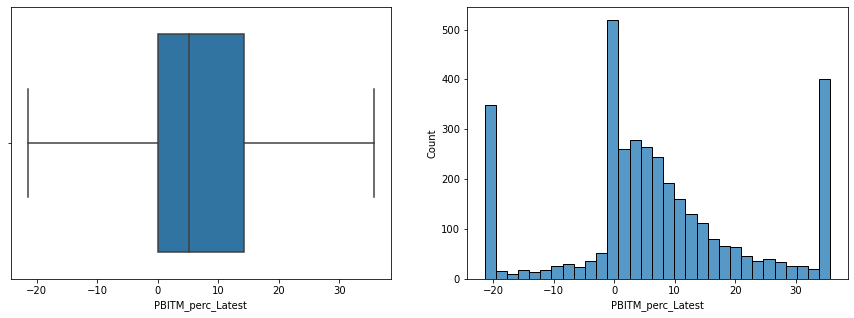

************************************************************************************************************************ 
************************************************************************************************************************


In [25]:

for i in imp_cols:
    # Boxplots for each variable
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df,x=i)
    
    plt.subplot(1,2,2)
    sns.histplot(df[i])
    plt.show()
    print("*"*120,"\n"+'*'*120)

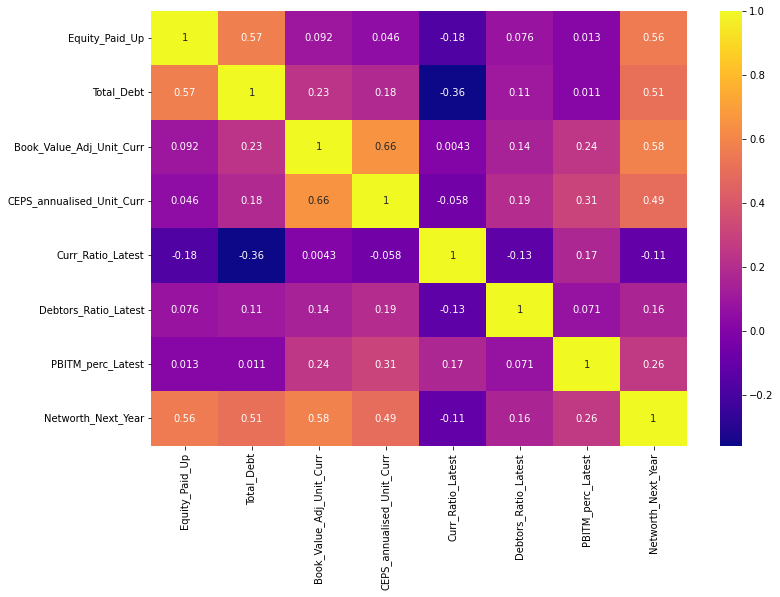

In [26]:
corr= df[imp_cols_tar].corr()
plt.figure(figsize=[12,8])
sns.heatmap(corr,annot=True,cmap='plasma');

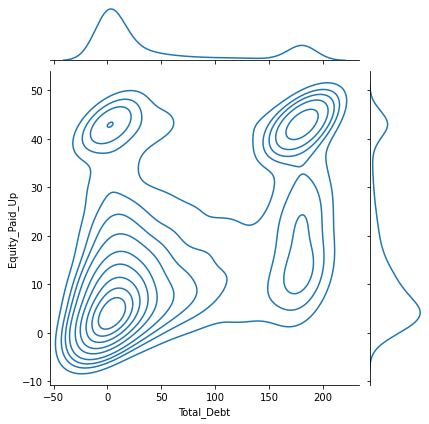

In [27]:
sns.jointplot(data=df,x='Total_Debt',y='Equity_Paid_Up',kind='kde');

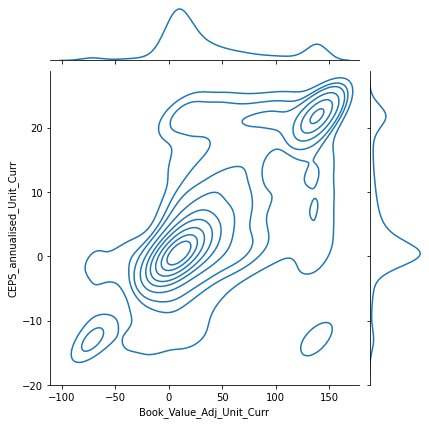

In [28]:
sns.jointplot(data=df,x='Book_Value_Adj_Unit_Curr',y='CEPS_annualised_Unit_Curr',kind='kde');

# Feature Selection and Train Test Spilt

In [29]:
df=df.drop('Networth_Next_Year',axis=1) # dropping the target variable as we have put it in y variable already

In [30]:
X = df.drop('Co_Name',axis=1)
X = X.drop('Co_Code',axis=1)

In [31]:
#FOR CHECKING VARIATION INFLATION FACTOR

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending = False).reset_index(drop=True)

    return(vif)

In [32]:
calc_vif(X).head()

,variables,VIF
0,Net_Sales,1706.832821
1,Gross_Sales,977.479021
2,Value_Of_Output,691.362884
3,ROG_Gross_Sales_perc,542.393959
4,ROG_Net_Sales_perc,541.883749


In [33]:
imp_cols = list(X.columns)
imp_cols.remove('Capital_exp_in_forex')
imp_cols.remove('ROG_Rev_earn_in_forex_perc')
imp_cols.remove('ROG_Rev_exp_in_forex_perc')

In [34]:
#again calc VIF and droping variable iteratively we can use for loop to reach deisred VIF level (value = 5)

while calc_vif(X[imp_cols])['VIF'][0]>5:
    drop_var = calc_vif(X[imp_cols])['variables'][0]
    imp_cols.remove(drop_var)
    print(drop_var)

Net_Sales
ROG_Gross_Sales_perc
Gross_Sales
PBDT
Total_Assets_to_Liab
PAT
Value_Of_Output
CPM_perc_Latest
Curr_Assets
PBIDT
PBIDTM_perc_Latest
ROG_PBDT_perc
Capital_Employed
PBT
Book_Value_Unit_Curr
CP
Value_of_Output_to_Total_Assets
ROG_PBIDT_perc
Cost_of_Prod
PBDTM_perc_Latest
ROG_PBT_perc
Gross_Block
Curr_Liab_and_Prov
Fixed_Assets_Ratio_Latest
PBIT
Networth
APATM_perc_Latest
ROG_PAT_perc


In [35]:
len(imp_cols)

33

In [36]:
X = X[imp_cols]

In [37]:
calc_vif(X).head()

,variables,VIF
0,CEPS_annualised_Unit_Curr,4.593954
1,Market_Capitalisation,4.111095
2,Selling_Cost,4.082803
3,Total_Debt,4.056497
4,ROG_Capital_Employed_perc,3.858161


In [38]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

# Modelling

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
LogR = LogisticRegression()
selector = RFE(estimator = LogR, n_features_to_select=7, step=1)

In [43]:
selector.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=7)

In [44]:
selector.n_features_

7

In [45]:
df_RFE = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df_RFE[df_RFE['Rank'] == 1]

,Feature,Rank
1,Total_Debt,1
8,Book_Value_Adj_Unit_Curr,1
9,Market_Capitalisation,1
10,CEPS_annualised_Unit_Curr,1
23,Curr_Ratio_Latest,1
28,PBITM_perc_Latest,1
32,Value_of_Output_to_Gross_Block,1


In [46]:
import statsmodels.formula.api as SM

In [47]:
final_cols_RFE = list(df_RFE[df_RFE['Rank'] == 1]['Feature'].values)

In [48]:
model = SM.logit(formula = "y_train ~ " + " + ".join(final_cols_RFE),data=X_train[final_cols_RFE]).fit()

Optimization terminated successfully.
         Current function value: 0.121967
         Iterations 10


In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            7
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  0.6299
Time:                        17:07:51   Log-Likelihood:                -292.84
converged:                       True   LL-Null:                       -791.24
Covariance Type:            nonrobust   LLR p-value:                5.960e-211
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -7.1659      0.450    -15.916      0.000      -8.048      -6.283
Total_Debt                         0.6512      0.161      4.045      0.000       0.336       0.967
Book_Value_Adj_Unit_Curr          -5.9327      0.531    -11.162      0.000      -6.974      -4.891
Market_Capitalisation             -0.5382      0.224     -2.405      0.016      -0.977      -0.100
CEPS_annualised_Unit_Curr         -0.9474      0.263     -3.607      0.000      -1.462      -0.433
Curr_Ratio_Latest                 -0.9633      0.164     -5.890      0.000      -1.284      -0.643
PBITM_perc_Latest                 -0.5722      0.127     -4.494      0.000      -0.822      -0.323
Value_of_Output_to_Gross_Block    -0.4008      0.159     -2.517      0.012      -0.713      -0.089
==================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Validating the model on train and test set

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [51]:
y_pred_train = np.where(model.predict(X_train[final_cols_RFE])>0.5,1,0)
y_pred_test = np.where(model.predict(X_test[final_cols_RFE])>0.5,1,0)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2156
           1       0.92      0.67      0.78       245

    accuracy                           0.96      2401
   macro avg       0.94      0.83      0.88      2401
weighted avg       0.96      0.96      0.96      2401



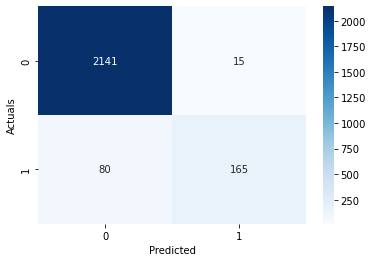

In [52]:
print(classification_report(y_train,y_pred_train))
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1042
           1       0.88      0.72      0.79       142

    accuracy                           0.95      1184
   macro avg       0.92      0.85      0.88      1184
weighted avg       0.95      0.95      0.95      1184



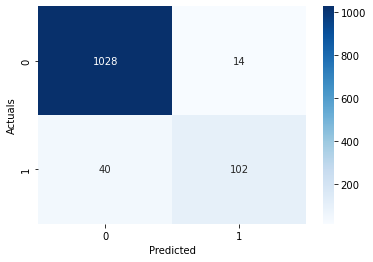

In [53]:
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

In [54]:
unique,counts = np.unique(y,return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3198]
 [   1  387]]


#### USING SMOTE FOR CLASS IMBALANCE

In [55]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [56]:
unique,counts = np.unique(y_train,return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2156]
 [   1  245]]


In [57]:
unique,counts = np.unique(y_res,return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2156]
 [   1 2156]]


In [58]:
selector_smote = selector.fit(X_res,y_res)

In [59]:
selector_smote.n_features_

7

In [60]:
df_RFE_SMOTE = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector_smote.ranking_})
df_RFE_SMOTE[df_RFE_SMOTE['Rank'] == 1]

,Feature,Rank
0,Equity_Paid_Up,1
1,Total_Debt,1
8,Book_Value_Adj_Unit_Curr,1
10,CEPS_annualised_Unit_Curr,1
23,Curr_Ratio_Latest,1
25,Debtors_Ratio_Latest,1
28,PBITM_perc_Latest,1


In [61]:
final_cols_RFE_SMOTE = list(df_RFE_SMOTE[df_RFE_SMOTE['Rank'] == 1]['Feature'].values)

In [62]:
model = SM.logit(formula = "y_train ~ " + " + ".join(final_cols_RFE_SMOTE),data=X_train[final_cols_RFE_SMOTE]).fit()

Optimization terminated successfully.
         Current function value: 0.122211
         Iterations 10


In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            7
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  0.6292
Time:                        17:07:53   Log-Likelihood:                -293.43
converged:                       True   LL-Null:                       -791.24
Covariance Type:            nonrobust   LLR p-value:                1.068e-210
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.3451      0.462    -15.911      0.000      -8.250      -6.440
Equity_Paid_Up               -0.4405      0.159     -2.764      0.006      -0.753      -0.128
Total_Debt                    0.8092      0.180      4.498      0.000       0.457       1.162
Book_Value_Adj_Unit_Curr     -6.3442      0.550    -11.530      0.000      -7.423      -5.266
CEPS_annualised_Unit_Curr    -1.0719      0.262     -4.091      0.000      -1.585      -0.558
Curr_Ratio_Latest            -1.0444      0.165     -6.334      0.000      -1.367      -0.721
Debtors_Ratio_Latest         -0.3091      0.132     -2.345      0.019      -0.567      -0.051
PBITM_perc_Latest            -0.6864      0.132     -5.216      0.000      -0.944      -0.428
=============================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [64]:
pred_train_smote = np.where(model.predict(X_res[final_cols_RFE_SMOTE])>0.5,1,0)
pred_test_smote = np.where(model.predict(X_test[final_cols_RFE_SMOTE])>0.5,1,0)

In [65]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2156
           1       0.99      0.70      0.82      2156

    accuracy                           0.85      4312
   macro avg       0.88      0.85      0.84      4312
weighted avg       0.88      0.85      0.84      4312



In [66]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1042
           1       0.88      0.70      0.78       142

    accuracy                           0.95      1184
   macro avg       0.92      0.84      0.88      1184
weighted avg       0.95      0.95      0.95      1184



AUC: 0.9667032675779031


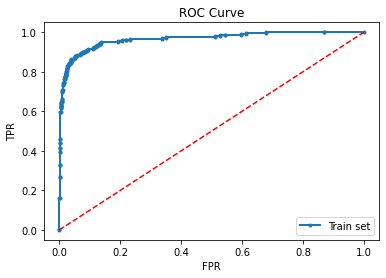

In [67]:
from sklearn import metrics

y_prob = model.predict(X_train[final_cols_RFE_SMOTE])
print('AUC:',metrics.roc_auc_score(y_train,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

#### ADJUSTMENT OF THRESHHOLD BASED ON THE TPR AND FPR

In [68]:
optimal_idx= np.argmax(tpr-fpr)
optimal_threshold = thresh[optimal_idx]
optimal_threshold

0.19534886408204244

In [69]:
y_prob = model.predict(X_train[final_cols_RFE_SMOTE])

#using this as a threshold for train data
y_class_pred_train=np.where(y_prob>optimal_threshold,1,0)

In [70]:
y_prob = model.predict(X_test[final_cols_RFE_SMOTE])
#using this as a threshold for test data
y_class_pred=np.where(y_prob>optimal_threshold,1,0)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2156
           1       0.65      0.88      0.75       245

    accuracy                           0.94      2401
   macro avg       0.82      0.91      0.86      2401
weighted avg       0.95      0.94      0.94      2401



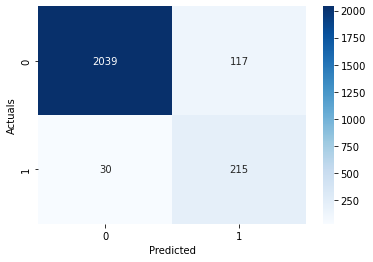

In [71]:
print(classification_report(y_train, y_class_pred_train))
sns.heatmap(confusion_matrix(y_train,y_class_pred_train),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1042
           1       0.60      0.92      0.73       142

    accuracy                           0.92      1184
   macro avg       0.79      0.92      0.84      1184
weighted avg       0.94      0.92      0.92      1184



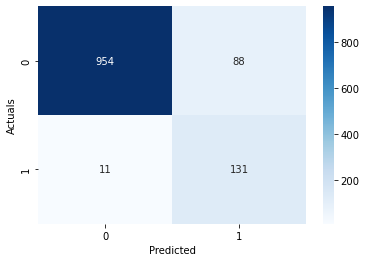

In [72]:
print(classification_report(y_test, y_class_pred))
sns.heatmap(confusion_matrix(y_test,y_class_pred),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

In [73]:
final_cols_RFE_SMOTE # Final features which were obtained from the analysis

['Equity_Paid_Up',
 'Total_Debt',
 'Book_Value_Adj_Unit_Curr',
 'CEPS_annualised_Unit_Curr',
 'Curr_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'PBITM_perc_Latest']

In [84]:
pd.DataFrame(model.conf_int()[1].round(2))

,1
Intercept,-6.44
Equity_Paid_Up,-0.13
Total_Debt,1.16
Book_Value_Adj_Unit_Curr,-5.27
CEPS_annualised_Unit_Curr,-0.56
Curr_Ratio_Latest,-0.72
Debtors_Ratio_Latest,-0.05
PBITM_perc_Latest,-0.43
